In [24]:
from ast import Return
from asyncore import write
from cgitb import text
import csv
from email import header
from operator import contains
from bs4 import BeautifulSoup
import requests
from csv import writer
from pprint import pprint
from re import search
import pandas as pd
import numpy as np

import plotly
import pandas as pd
import plotly.graph_objs as go 

from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot 
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'plotly'

In [2]:
url= "https://www.kalibrr.com/job-board/te/data%20analyst/1"
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36'}

data = []
count_page = 0
# with open ('loker.csv','w',encoding='utf8',newline='') as f:   
for page in range(1,51):
    count_page += 1
    print('scrapping page',count_page)
    req = requests.get(url, headers = headers)
    # thewriter = writer(f)
    soup = BeautifulSoup(req.content, 'html.parser')
    lists = soup.findAll('div', class_="k-grid k-border-tertiary-ghost-color k-text-sm k-p-4 md:k-p-6 css-1b4vug6")

    for list in lists:
        title = list.find('a', class_='k-text-primary-color').text.replace('\n','')
        company = list.find('span', class_="k-inline-flex k-items-center k-mb-1").text.replace('\n','')
        try:
            location = list.find('span', class_="k-text-subdued k-block").text.replace('\n','')
            if 'Indonesia' in location:
                location.replace('Indonesia','')
        except : 
            location =''

        try:
            fee = list.select_one('div[class*="k-flex k-flex-col md:k-flex-row"]').get_text().split()[:]
            if 'IDR' not in fee:   
                fee = ''  
            else:
                fee = fee[3:]
            
        except:
            fee = ''

        fee = "".join(fee)
        info = [title,company,location,fee]
        data.append(info)
        print(info)
name_column = ['Title','Company','Location','Fee']
writer = csv.writer(open('loker data.csv','w',newline=''))
writer.writerow(name_column)
for x in data : writer.writerow(x)

scrapping page 1
['Senior Data Analyst', 'Blibli', 'Central Jakarta, Indonesia', '']
['Data Analyst', 'Touchten Games', 'Central Jakarta, Indonesia', '']
['Senior Data Analyst', 'JULO', 'South Jakarta, Indonesia', '']
['Data Scientist', 'PT Kamoro Maxima Integra', 'Jakarta, Indonesia', '']
['Associate Data Analyst', 'Alodokter', 'Kota Jakarta Selatan, Indonesia', '']
['Data Analyst', 'LIF', 'Jakarta Pusat, Indonesia', '']
['Data Engineer and Analytics', 'FinAccel', 'South Jakarta, Indonesia', '']
['Data Analyst & Master Data', 'PT BFI Finance Indonesia Tbk', 'Tangerang, Indonesia', '']
['Data Scientist', 'PT Majoo Teknologi Indonesia', 'South Jakarta, Indonesia', '']
['Data Analyst', 'Tjetak', 'Central Jakarta, Indonesia', '·IDR11,000,000.00-IDR15,000,000.00/month']
['Data Analyst', 'SehatQ', 'Central Jakarta City, Indonesia', '']
['Business Intelligence Developer', 'PT IDStar Cipta Teknologi', 'South Jakarta, Indonesia', '']
['Digital Marketing & Sales Executive', 'Simbadda Group', 'J

In [3]:
df = pd.DataFrame(data =data, columns=['Title','Company','Location','Fee'], index= np.arange(1, len(data)+1))
df

,Title,Company,Location,Fee
1,Senior Data Analyst,Blibli,"Central Jakarta, Indonesia",
2,Data Analyst,Touchten Games,"Central Jakarta, Indonesia",
3,Senior Data Analyst,JULO,"South Jakarta, Indonesia",
4,Data Scientist,PT Kamoro Maxima Integra,"Jakarta, Indonesia",
5,Associate Data Analyst,Alodokter,"Kota Jakarta Selatan, Indonesia",
...,...,...,...,...
746,Business Intelligence Developer,PT IDStar Cipta Teknologi,"South Jakarta, Indonesia",
747,Data Engineer and Analytics,FinAccel,"South Jakarta, Indonesia",
748,Software Quality Assurance (QA) Engineer,DOT Indonesia,"Malang, Indonesia",
749,Data Engineer,Pintap,"Jakarta, Indonesia","IDR8,000,000.00-IDR17,000,000.00/month"


In [4]:
df.shape

(750, 4)

In [5]:
df.Location.value_counts()

South Jakarta, Indonesia           200
Central Jakarta, Indonesia         150
Jakarta, Indonesia                 125
Jakarta Pusat, Indonesia            88
Kota Jakarta Selatan, Indonesia     50
Tangerang, Indonesia                50
Central Jakarta City, Indonesia     50
Malang, Indonesia                   37
Name: Location, dtype: int64

In [6]:
Jakarta_Pusat = (df.Location=="Central Jakarta, Indonesia").sum() + (df.Location=="Jakarta Pusat, Indonesia").sum() + (df.Location=="Central Jakarta City, Indonesia").sum() 
Jakarta_Pusat

288

In [7]:
Jakarta_Selatan = (df.Location=="South Jakarta, Indonesia").sum() + (df.Location=="Kota Jakarta Selatan, Indonesia").sum() 
Jakarta_Selatan

250

In [9]:
df2 = df.copy()

In [10]:
conditions =[
    (df['Location'] == "South Jakarta, Indonesia"),
    (df.Location=="Kota Jakarta Selatan, Indonesia"),
    (df.Location =="Central Jakarta, Indonesia"),
    (df.Location=="Jakarta Pusat, Indonesia"),
    (df.Location=="Central Jakarta City, Indonesia"),
    (df.Location == "Jakarta, Indonesia"),
    (df.Location == "Tangerang, Indonesia"),
    (df.Location == "Malang, Indonesia"),
    (df.Location == "Jakarta Barat, Indonesia")]

values = ["Jaksel","Jaksel","Jakpus","Jakpus","Jakpus","Jakarta","Tangerang","Malang","Jakbar"]

df2['new_location'] = np.select(conditions,values)

In [11]:
df2

,Title,Company,Location,Fee,new_location
1,Senior Data Analyst,Blibli,"Central Jakarta, Indonesia",,Jakpus
2,Data Analyst,Touchten Games,"Central Jakarta, Indonesia",,Jakpus
3,Senior Data Analyst,JULO,"South Jakarta, Indonesia",,Jaksel
4,Data Scientist,PT Kamoro Maxima Integra,"Jakarta, Indonesia",,Jakarta
5,Associate Data Analyst,Alodokter,"Kota Jakarta Selatan, Indonesia",,Jaksel
...,...,...,...,...,...
746,Business Intelligence Developer,PT IDStar Cipta Teknologi,"South Jakarta, Indonesia",,Jaksel
747,Data Engineer and Analytics,FinAccel,"South Jakarta, Indonesia",,Jaksel
748,Software Quality Assurance (QA) Engineer,DOT Indonesia,"Malang, Indonesia",,Malang
749,Data Engineer,Pintap,"Jakarta, Indonesia","IDR8,000,000.00-IDR17,000,000.00/month",Jakarta


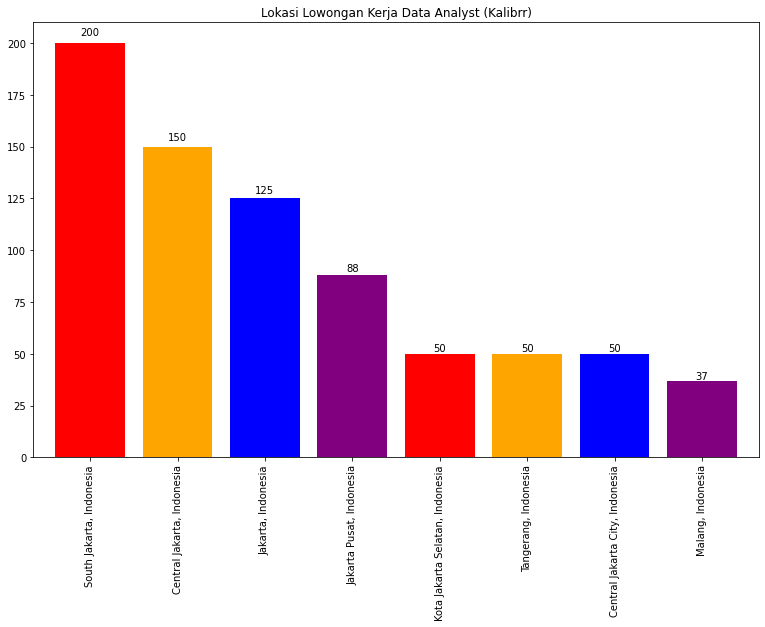

In [12]:
colors_list = ['Red','Orange', 'Blue', 'Purple']
ax = df.Location.value_counts().plot(kind='bar', figsize=(13,8), width=0.8,
    title='Lokasi Lowongan Kerja Data Analyst (Kalibrr)',color= colors_list, edgecolor=None)


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

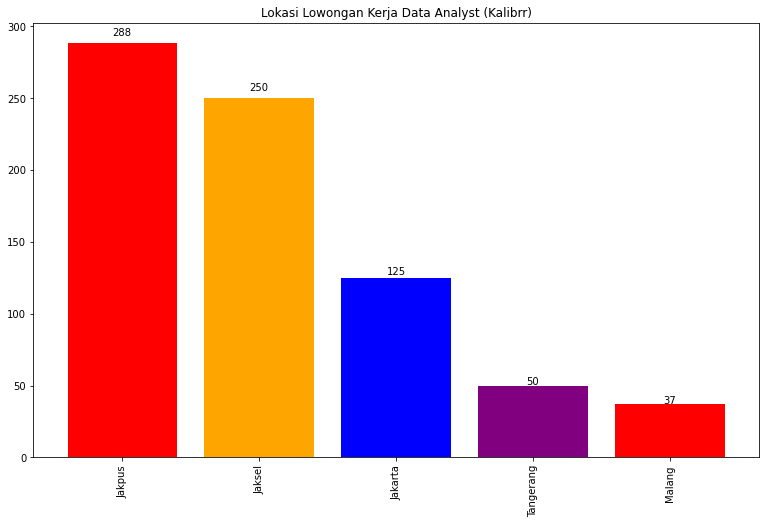

In [13]:
colors_list = ['Red','Orange', 'Blue', 'Purple']
ax = df2.new_location.value_counts().plot(kind='bar', figsize=(13,8), width=0.8,
    title='Lokasi Lowongan Kerja Data Analyst (Kalibrr)',color= colors_list, edgecolor=None)


for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

In [14]:
df.Fee.replace('',np.nan,inplace=True)

In [41]:
print(f'Jumlah data Fee kosong:',df.Fee.isna().sum(),'\ndari total data yang tersedia:',len(df))

print(f'Persentase data kosong:',df.Fee.isna().sum()/len(df)*100,'%')

print('\nBerikut gambaran persentase data kosong dan tidak:')
kosong = df.Fee.isna().sum()/len(df)*100
isi = 100 - kosong

vis_pie = pd.DataFrame({
    'value' : ['Null Value','Not Null Value'],
    'percentage' : [kosong, isi]})
vis_pie

# df.groupby(df.Fee.isna()).sum().plot(kind='pie', subplots=True)

Jumlah data Fee kosong: 629 
dari total data yang tersedia: 750
Persentase data kosong: 83.86666666666667 %

Berikut gambaran persentase data kosong dan tidak:


,value,percentage
0,Null Value,83.866667
1,Not Null Value,16.133333


<AxesSubplot:title={'center':'Compare null values and not'}, ylabel='percentage'>

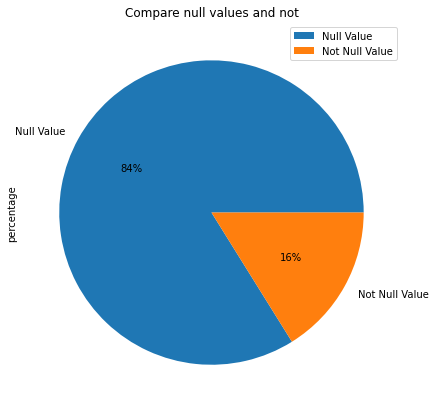

In [52]:
vis_pie.plot(kind='pie',figsize=(10,7),y='percentage', labels=['Null Value','Not Null Value'],autopct="%1.0f%%",title='Compare null values and not')